In [84]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
sp.init_printing()

In [86]:
x = sp.Symbol('x')
x

In [87]:
w = sp.Symbol('omega')
w

In [88]:
x1 = sp.Symbol('x_1')
x1

In [89]:
i = sp.Integer(10)
i, type(i)

(10, sympy.core.numbers.Integer)

In [90]:
sp.Pow(58, 2340)

In [91]:
sp.factorial(5893)

379778009531489599299447336863416233808872540725413319914169483653713619145524
544715133280859928610327934427220162307837550779038266892082861679306593720286
922885857355971343934746943644814444245172520796939744047006559898412619290541
459657703599552780527582826976070463008057271956626888349432423768169502251300
164339376149307760415133675490338558672090382749394844157588938781159296216566
297737152398151043910679583688952215967129519400852959980634740250074103387334
395400345213405756441939724462983959958554016592164645676386329430644989291215
141098317914010745527220659304897516822878917689505934673662546848199186821263
336785081638683163583007495429830340370121192522772555758958207410286356913407
538586620474893585140105288615190133522323045569995021502356560409386837827656
426949213459490012089633582433284747082273742494916909820990499422140490105007
950602318508451621506905896744407854859678900503137029594371577551098561360712
6976199171279789700626722709977193871191612313232766

In [92]:
f = sp.Float(0.3)
f, type(f)

(0.300000000000000, sympy.core.numbers.Float)

In [93]:
f = sp.Float(0.3, 30)
f, type(f)

(0.299999999999999988897769753748, sympy.core.numbers.Float)

In [94]:
f = sp.Float('0.3', 30)
f, type(f)

(0.300000000000000000000000000000, sympy.core.numbers.Float)

In [96]:
r = sp.Rational(10, 3)
r, type(r)

(10/3, sympy.core.numbers.Rational)

In [97]:
r.evalf(30)

In [98]:
2 * x**2 + 1

In [102]:
n = sp.Symbol('n', integer=True)
sp.sin(n * sp.pi), sp.cos(n * sp.pi)

In [114]:
x = sp.Symbol('x')
a = sp.Symbol('a', positive=True)

ex = sp.exp(-a*x**2)
ex

In [104]:
ex.diff(x)

In [105]:
ex.diff(x, x)

In [107]:
dex = ex.diff(x, 10)
dex

In [108]:
dex.subs(a, 5)

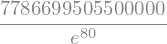

In [109]:
dex.subs(a, 5).subs(x, 4)

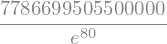

In [110]:
dex.subs({a: 5, x: 4})

In [111]:
dex.subs({a: 5, x: 4}).evalf(30)

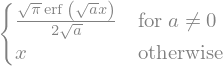

In [112]:
sp.integrate(ex, x)

In [115]:
sp.integrate(ex, (x, -sp.oo, sp.oo))

In [116]:
a = sp.Symbol('a')
b = sp.Symbol('b')
c = sp.Symbol('c')
x = sp.Symbol('x')

a, b, c, x

In [117]:
sp.symbols('a b c x')

In [118]:
a * x**2 + b * x + c

In [120]:
eq = sp.Eq(a * x**2 + b * x + c, 0)
eq

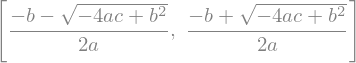

In [121]:
sp.solve(eq, x)

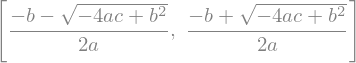

In [122]:
sp.solve(a * x**2 + b * x + c, x)

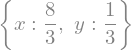

In [123]:
x, y = sp.symbols('x y')
sp.solve((x + y - 3, 2 * x - y - 5), (x, y))

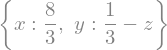

In [124]:
x, y, z = sp.symbols('x y z')
sp.solve((x + y - 3 + z, 2 * x - y - 5 - z), (x, y))

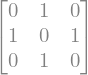

In [127]:
m = sp.Matrix([
    [0, 1, 0],
    [1, 0, 1],
    [0, 1, 0]])
m


In [128]:
m.det()

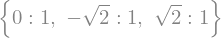

In [129]:
m.eigenvals()

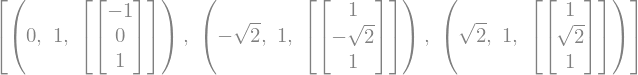

In [130]:
m.eigenvects()

$$\frac{d^2 x(t)}{dt^2}=-\omega_0^2 x(t)$$

In [133]:
x = sp.Function('x')
t = sp.Symbol('t')
w0 = sp.Symbol('omega_0', positive=True, real=True)
x0 = sp.Symbol('x_0', real=True)
v0 = sp.Symbol('v_0', real=True)

x(t), t, w0, x0, v0

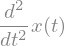

In [134]:
x(t).diff(t, t)

In [137]:
-w0**2 * x(t)

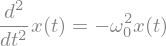

In [146]:
eq = sp.Eq(x(t).diff(t, t), -w0**2 * x(t))
eq

In [139]:
sp.dsolve(eq, x(t))

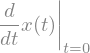

In [141]:
x(t).diff(t).subs(t, 0)

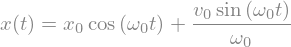

In [147]:
sol = sp.dsolve(eq, x(t), ics={x(0): x0, x(t).diff(t).subs(t, 0): v0})
sol

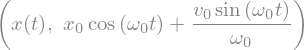

In [148]:
sol.lhs, sol.rhs

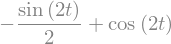

In [149]:
sol.rhs.subs({x0: 1, v0: -1, w0: 2})

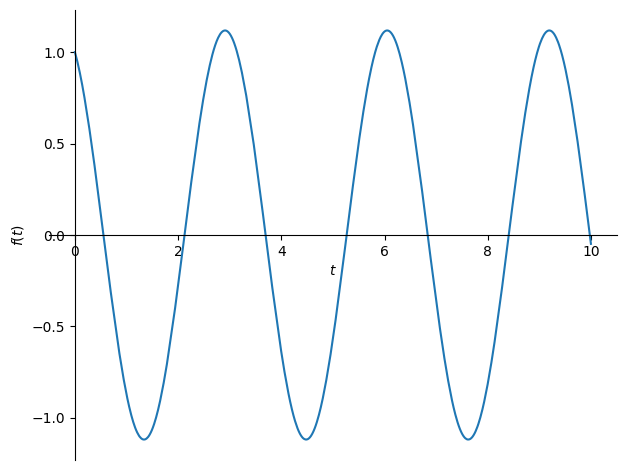

In [150]:
sp.plot(sol.rhs.subs({x0: 1, v0: -1, w0: 2}), (t, 0, 10))

In [151]:
soll = sp.lambdify(t, sol.rhs.subs({x0: 1, v0: -1, w0: 2}))
type(soll)

function

In [153]:
soll(3), type(soll(3))

(1.0998780357498288, numpy.float64)

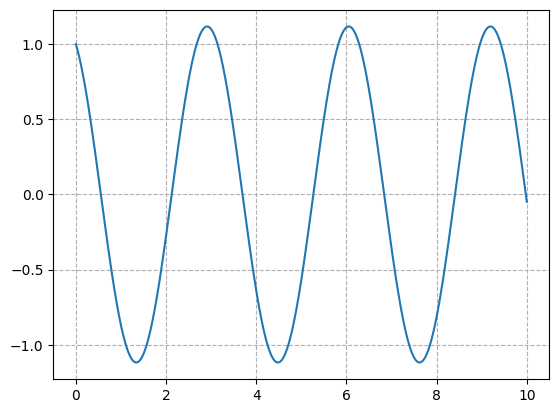

In [155]:
ts = np.linspace(0, 10, 1000)
plt.plot(ts, soll(ts))
plt.grid(linestyle='--')